In [115]:
import pandas as pd
import datetime
import statistics
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

%matplotlib inline

In [2]:
filepath = "Sensor_readings__with_temperature__light__humidity_every_5_minutes_at_8_locations__trial__2014_to_2015_.csv"
sensor_df = pd.read_csv(filepath)

In [3]:
sensor_refactored_df = sensor_df.drop(columns=['mac', 'boardtype', 'boardid', 'model', 'latitude', 'longitude', 'elevation', 'rowid', 'Position'])
sensor_refactored_df

,timestamp,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,location
0,12/15/2014 01:40:00 AM,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,Fitzroy Gardens
1,12/15/2014 01:40:00 AM,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,Fitzroy Gardens
2,12/15/2014 01:45:00 AM,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,Fitzroy Gardens
3,12/15/2014 01:45:00 AM,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,Fitzroy Gardens
4,12/15/2014 01:45:00 AM,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,Fitzroy Gardens
5,12/15/2014 01:50:00 AM,21.3,21.3,21.3,96.4,96.4,96.4,41.2,41.2,41.2,Fitzroy Gardens
6,12/15/2014 01:55:00 AM,23.2,23.2,23.2,93.5,93.5,93.5,47.0,47.0,47.0,Fitzroy Gardens
7,12/15/2014 01:55:00 AM,21.6,21.6,21.6,97.2,97.2,97.2,44.5,44.5,44.5,Fitzroy Gardens
8,12/15/2014 01:55:00 AM,21.6,21.6,21.6,97.4,97.4,97.4,45.3,45.3,45.3,Fitzroy Gardens
9,12/15/2014 02:00:00 AM,23.5,23.5,23.5,97.4,97.4,97.4,43.7,43.7,43.7,Fitzroy Gardens


In [4]:
def calculateMedian(values):
        
    local_copy = list(values)
    local_copy.sort()
    center = len(local_copy)/2

    if len(local_copy) % 2:
        return float(local_copy[center])

    return (local_copy[int(center-1.0)]+local_copy[int(center)])/2.0

In [5]:
def getMedianOfDataframeHeaders(dataframe):
    headers = list(dataframe.columns.values)
    temp_list = []
    temp_dict = dict()
    headers.remove('location')
    
    for header in headers[1:]:
        serie = dataframe.get(header)
        result = calculateMedian(serie)
        temp_dict[header] = result

    return temp_dict


In [6]:
result = getMedianOfDataframeHeaders(sensor_refactored_df)
result_df = pd.DataFrame(result,  index=['average'])

In [7]:
headers = list(sensor_refactored_df.columns.values)
temp_dict = dict()
headers.remove('location')
for header in headers[1:]:
        result = statistics.median(sensor_df.get(header))
        temp_dict[header] = result
result_df2 = pd.DataFrame(temp_dict,  index=['Control average'])

Median and standard deviation of my own functions compared to the functions provided my python

In [8]:
def standardDeviation(dataframe):
    headers = list(dataframe.columns.values)
    
    temp_dict = dict()
    temp_location = dict()
    headers.remove('location')
    
    for location in dataframe.location.unique():
        temp_dict = dict()
        dataframe_copy = pd.DataFrame()
        dataframe_copy = dataframe.loc[dataframe['location'] == location]
        
        for header in headers[1:]:
            tempString = float()
            divided = float()
            result = float()
            column = dataframe_copy.get(header)
            sumOfColumn = column.sum()
            lengthOfColumn = column.size
            mean = sumOfColumn / lengthOfColumn
            
            for x in column:
                squared = float()
                squared = (x - mean)**2
                tempString = tempString + squared

            divided = tempString / lengthOfColumn
            result = math.sqrt(divided)

            temp_dict[header] = '{:.4f}'.format(result)
        temp_location[location] = temp_dict
    return temp_location

resultDict = standardDeviation(sensor_refactored_df)  

result_df3 = pd.DataFrame(resultDict.get('Fitzroy Gardens'),  index=['Standard deviation: Fitroy Gardens'])
result_df4 = pd.DataFrame(resultDict.get('Docklands Library'),  index=['Standard deviation: Docklands Library'])

temp_serie1 = dict(sensor_refactored_df.loc[sensor_refactored_df['location'] == 'Fitzroy Gardens'].std(axis=0))
temp_serie2 = dict(sensor_refactored_df.loc[sensor_refactored_df['location'] == 'Docklands Library'].std(axis=0))

result_df5 = pd.DataFrame(temp_serie1,  index=['Control Standard deviation: Firtroy'])
result_df6 = pd.DataFrame(temp_serie2,  index=['Control Standard deviation: Docklands'])

frames = [result_df, result_df2, result_df3, result_df5, result_df4, result_df6]

result = pd.concat(frames, sort=True)

result

,humidity_avg,humidity_max,humidity_min,light_avg,light_max,light_min,temp_avg,temp_max,temp_min
average,51,51,51,49.9,49.9,49.9,17.7,17.7,17.7
Control average,51,51,51,49.9,49.9,49.9,17.7,17.7,17.7
Standard deviation: Fitroy Gardens,16.8981,16.8981,16.8981,43.5112,43.5112,43.5112,4.7356,4.7356,4.7356
Control Standard deviation: Firtroy,16.8987,16.8987,16.8987,43.5127,43.5127,43.5127,4.73575,4.73575,4.73575
Standard deviation: Docklands Library,11.8806,11.8806,11.8806,43.9647,43.9647,43.9647,5.6675,5.6675,5.6675
Control Standard deviation: Docklands,11.8808,11.8808,11.8808,43.9652,43.9652,43.9652,5.66756,5.66756,5.66756


In [9]:
timestamp = sensor_refactored_df.get('timestamp')
temp_serie = pd.to_datetime(timestamp);
sensor_refactored_df['dateTime'] = pd.Series(temp_serie, index=sensor_refactored_df.index)

In [10]:
sensor_refactored_df = sensor_refactored_df.assign(dateTime=pd.Series(temp_serie.values))
sensor_refactored_df

,timestamp,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,location,dateTime
0,12/15/2014 01:40:00 AM,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,Fitzroy Gardens,2014-12-15 01:40:00
1,12/15/2014 01:40:00 AM,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,Fitzroy Gardens,2014-12-15 01:40:00
2,12/15/2014 01:45:00 AM,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,Fitzroy Gardens,2014-12-15 01:45:00
3,12/15/2014 01:45:00 AM,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,Fitzroy Gardens,2014-12-15 01:45:00
4,12/15/2014 01:45:00 AM,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,Fitzroy Gardens,2014-12-15 01:45:00
5,12/15/2014 01:50:00 AM,21.3,21.3,21.3,96.4,96.4,96.4,41.2,41.2,41.2,Fitzroy Gardens,2014-12-15 01:50:00
6,12/15/2014 01:55:00 AM,23.2,23.2,23.2,93.5,93.5,93.5,47.0,47.0,47.0,Fitzroy Gardens,2014-12-15 01:55:00
7,12/15/2014 01:55:00 AM,21.6,21.6,21.6,97.2,97.2,97.2,44.5,44.5,44.5,Fitzroy Gardens,2014-12-15 01:55:00
8,12/15/2014 01:55:00 AM,21.6,21.6,21.6,97.4,97.4,97.4,45.3,45.3,45.3,Fitzroy Gardens,2014-12-15 01:55:00
9,12/15/2014 02:00:00 AM,23.5,23.5,23.5,97.4,97.4,97.4,43.7,43.7,43.7,Fitzroy Gardens,2014-12-15 02:00:00


Plot of temp_avg on time axis each week

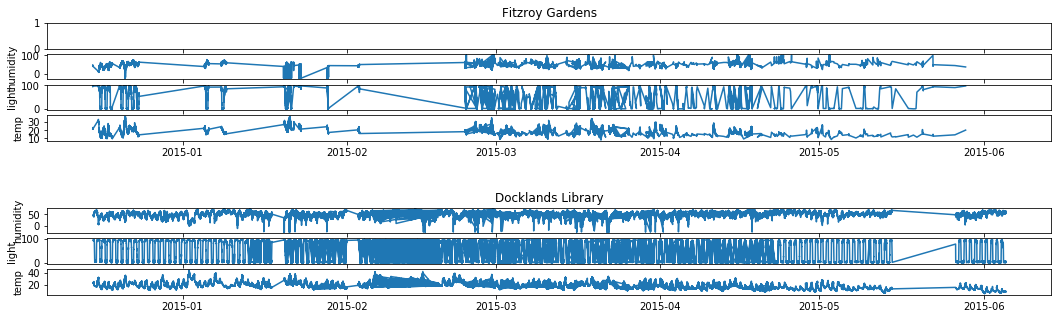

In [151]:

#plot data
df = sensor_refactored_df.drop(columns=['temp_max', 'temp_min', 'light_max', 'light_min', 'humidity_min', 'humidity_max'])

fig = plt.figure(figsize=(18,5))
loc_filter_fit = df.location == 'Fitzroy Gardens'
loc_filter_doc = df.location == 'Docklands Library'
time_filter = df.dateTime < pd.Timestamp('2015-01-01')

ax1 = plt.subplot2grid((9,1), (0,0), rowspan=1, colspan=1)
plt.title('Fitzroy Gardens')
ax2 = plt.subplot2grid((9,1), (1,0), rowspan=1, colspan=2, sharex=ax1)

plt.ylabel('humidity')
ax3 = plt.subplot2grid((9,1), (2,0), rowspan=1, colspan=2, sharex=ax1)
plt.ylabel('light')
ax4 = plt.subplot2grid((9,1), (3,0), rowspan=1, colspan=2, sharex=ax1)
plt.ylabel('temp')

#set ticks every week
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))
ax5 = plt.subplot2grid((9,2), (6,0), rowspan=1, colspan=2, sharex=ax1)

plt.title('Docklands Library')

plt.ylabel('humidity')
ax6 = plt.subplot2grid((9,1), (7,0), rowspan=1, colspan=2, sharex=ax1)
plt.ylabel('light')
ax7 = plt.subplot2grid((9,2), (8,0), rowspan=1, colspan=2, sharex=ax1)
plt.ylabel('temp')


ax2.plot(df[loc_filter_fit].dateTime, df[loc_filter_fit].humidity_avg)
ax3.plot(df[loc_filter_fit].dateTime, df[loc_filter_fit].light_avg)
ax4.plot(df[loc_filter_fit].dateTime, df[loc_filter_fit].temp_avg)



ax5.plot(df[loc_filter_doc].dateTime, df[loc_filter_doc].humidity_avg)
ax6.plot(df[loc_filter_doc].dateTime, df[loc_filter_doc].light_avg)
ax7.plot(df[loc_filter_doc].dateTime, df[loc_filter_doc].temp_avg)
